In [30]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn


In [31]:
Univ = pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/Universities.csv")

In [32]:
# Normalization function # use sklearn library norm
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [33]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Univ.iloc[:,1:])

In [34]:
df_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


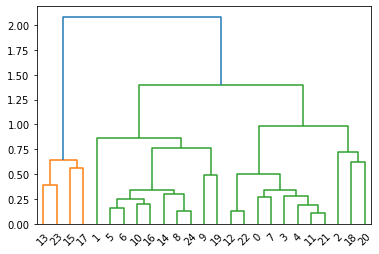

In [35]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [36]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [37]:
hc.fit(df_norm)
# hc.predict(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [38]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
# Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [39]:
y_hc

array([3, 4, 2, 3, 3, 0, 0, 3, 0, 0, 0, 3, 3, 1, 0, 1, 0, 1, 2, 0, 2, 3,
       3, 1, 0])

In [40]:
Univ['h_clusterid'] = y_hc

In [41]:
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,Brown,1310,89,22,13,22704,94,3
1,CalTech,1415,100,25,6,63575,81,4
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,3


In [42]:
Univ1=Univ.sort_values("h_clusterid")
Univ1.iloc[:,[0,-1]]

,Univ,h_clusterid
24,Yale,0
14,Princeton,0
10,MIT,0
9,JohnsHopkins,0
16,Stanford,0
19,UChicago,0
8,Harvard,0
5,Dartmouth,0
6,Duke,0
23,UWisconsin,1


Practice

In [53]:
from sklearn.datasets import load_iris
data = load_iris(as_frame=True).frame

In [54]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


# Import
iris=datasets.load_iris()
iris_data=pd.DataFrame(iris.data)
iris_data.columns=iris.feature_names
iris_data['flower_type']=iris.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


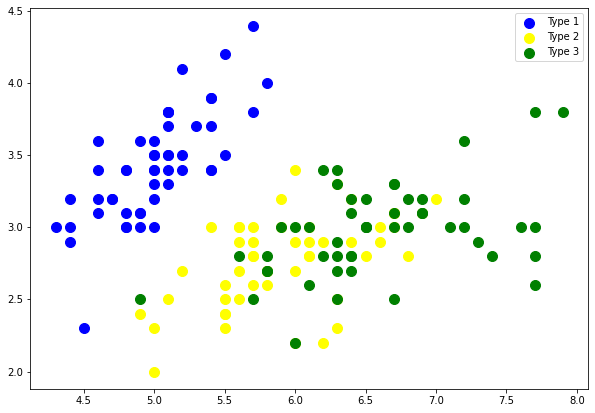

In [62]:
iris_X=iris_data.iloc[:,[0,1,2,3]].values
iris_Y=iris_data.iloc[:,4].values
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(iris_X[iris_Y==0,0],iris_X[iris_Y==0,1],s=100,c='blue',label='Type 1')
plt.scatter(iris_X[iris_Y==1,0],iris_X[iris_Y==1,1],s=100,c='Yellow',label='Type 2')
plt.scatter(iris_X[iris_Y==2,0],iris_X[iris_Y==2,1],s=100,c='green',label='Type 3')
plt.legend()
plt.show()


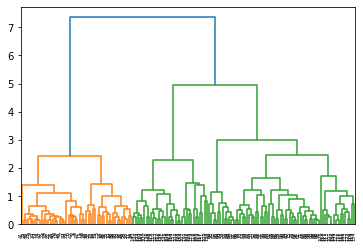

In [65]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(data, method='complete'))

In [66]:
hc.fit(data)
# hc.predict(data)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [67]:
# save clusters for chart
y_hc = hc.fit_predict(data)
# Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [68]:
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 4, 4, 3, 4, 4, 4, 3, 4, 3, 3, 4, 4, 4, 3, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])